# 07 -  Calculando probabilidades em Python

## Lançamento de uma moeda

In [ ]:
espaco_amostral = {'cara', 'coroa'}

In [ ]:
probabilidade_cara = 1 / len(espaco_amostral)
print(f'A probabilidade de cara é {probabilidade_cara}')

A probabilidade de cara é 0.5


In [ ]:
def resultado_cara(desfecho):
  return desfecho == 'cara'

def resultado_coroa(desfecho):
  return desfecho == 'coroa'

def resultado_qualquer(desfecho):
  return desfecho in ('cara', 'coroa')

In [ ]:
# Criando uma função que detecta eventos de interesse

def obtem_evento_interesse(condicao_evento, espaco_amostral):
  return set([desfecho for desfecho in espaco_amostral if condicao_evento(desfecho)])

In [ ]:
condicoes = [resultado_cara, resultado_coroa, resultado_qualquer]

In [ ]:
for condicao in condicoes:
  print(f'Condição {condicao.__name__}')
  evento = obtem_evento_interesse(condicao, espaco_amostral)
  print(f'evento: {evento}')

Condição resultado_cara
evento: {'cara'}
Condição resultado_coroa
evento: {'coroa'}
Condição resultado_qualquer
evento: {'coroa', 'cara'}


In [ ]:
def calcula_probabilidade(evento_interesse, espaco_amostral):
  evento = obtem_evento_interesse(evento_interesse, espaco_amostral)
  return len(evento) / len(espaco_amostral)



In [ ]:
for condicao in condicoes:
  prob = calcula_probabilidade(condicao, espaco_amostral)
  nome = condicao.__name__
  print(f'A probabilidade do evento {nome} acontecer é de {prob}')

A probabilidade do evento resultado_cara acontecer é de 0.5
A probabilidade do evento resultado_coroa acontecer é de 0.5
A probabilidade do evento resultado_qualquer acontecer é de 1.0


#### E se a moeda não for justa?

In [ ]:
espaco_amostral_ponderado= {'cara': 4, 'coroa': 1}

In [ ]:
tamanho_espaco_amostral = sum(espaco_amostral_ponderado.values())

In [ ]:
evento = obtem_evento_interesse(resultado_qualquer, espaco_amostral_ponderado)

In [ ]:
qtd_eventos = sum(espaco_amostral_ponderado[desfecho] for desfecho in evento)

In [ ]:
qtd_eventos

5

In [ ]:
def calcula_probabilidade(condicao_interesse, espaco_amostral):
  evento = obtem_evento_interesse(condicao_interesse, espaco_amostral)
  if type(espaco_amostral) == type(set()):
    return len(evento) / len(espaco_amostral)
  qtd_eventos = sum(espaco_amostral[desfecho] for desfecho in evento)
  return qtd_eventos/ sum(espaco_amostral.values())

In [ ]:
calcula_probabilidade(resultado_coroa, espaco_amostral_ponderado)

0.2

In [ ]:
calcula_probabilidade(resultado_coroa, espaco_amostral)

0.5

# Exemplo 1

Suponha que uma família tenha quatro filhos. Qual é a probabilidade de que exatamente duas das crianças sejam meninos? Assumiremos que cada criança tem a mesma probabilidade de ser um menino ou uma menina

Para resolver esse problema, podemos usar a teoria das probabilidades. O espaço amostral para o gênero de quatro crianças, assumindo que cada criança tem igual probabilidade de ser menino (M) ou menina (F), pode ser representado por todas as combinações possíveis de meninos e meninas. Há ($2^4 = 16$) combinações possíveis, uma vez que cada criança tem 2 possibilidades (menino ou menina) e há 4 crianças.

Para encontrar a probabilidade de que exatamente duas das crianças sejam meninos, precisamos contar o número de combinações em que isso ocorre. Podemos usar a fórmula de combinação para calcular isso, a fórmula é:


$C(n, k) = \frac{n!}{k!(n-k)!}$


onde \(n\) é o número total de crianças (4 neste caso) e \(k\) é o número de meninos (2 neste caso). Assim, o número de maneiras de escolher 2 meninos de 4 crianças é:


$C(4, 2) = \frac{4!}{2!(4-2)!}$


Depois de calcular isso, a probabilidade é simplesmente o número de combinações favoráveis (exatamente 2 meninos) dividido pelo número total de combinações possíveis (16). Dessa forma, a probabilidade de que exatamente duas das quatro crianças sejam meninos é de 0,375 ou 37,5%.

In [ ]:
possiveis_resultados = ['menino', 'menina']
espaco_amostral = set()
for filho1 in possiveis_resultados:
  for filho2 in possiveis_resultados:
    for filho3 in possiveis_resultados:
      for filho4 in possiveis_resultados:
        desfecho = (filho1, filho2, filho3, filho4)
        espaco_amostral.add(desfecho)

In [ ]:
def ter_dois_meninos(desfecho):
  return len([filho for filho in desfecho if filho == 'menino']) == 2

In [ ]:
prob = calcula_probabilidade(ter_dois_meninos, espaco_amostral)

In [ ]:
print(f'A probabilidade de nascer dois meninos nos 4 filhos é de {prob}')

A probabilidade de nascer dois meninos nos 4 filhos é de 0.375


Estamos calculando todas as combinações de uma maneira não muito eficiente. Vamos melhorar isso com a biblioteca itertools.

In [ ]:
from itertools import product

In [ ]:
todas_combinacoes = product(possiveis_resultados, repeat=4)

In [ ]:
len(set(todas_combinacoes))

16

In [ ]:
len(espaco_amostral)

16

In [ ]:
prob = calcula_probabilidade(ter_dois_meninos, set(todas_combinacoes)) ## execute antes o todas_combinacoes = product...

In [ ]:
prob

0.375

## Exercício 1

Suponha que nos seja mostrado um dado justo de seis faces cujas faces estão numeradas de 1 a 6. O dado é lançado seis vezes. Qual é a probabilidade de que esses seis lançamentos de dados somem 21?

## Calculando probabilidades de um possível valor dentro de um intervalo

In [ ]:
def esta_em_um_intervalo(valor, minimo, maximo):
  return minimo <= valor <= maximo

In [ ]:
esta_em_um_intervalo(4, 2, 5)

True

In [ ]:
from collections import defaultdict
espaco_amostral_ponderado = defaultdict(int)
for desfecho in espaco_amostral:
  total = sum(desfecho)
  espaco_amostral_ponderado[total] += 1

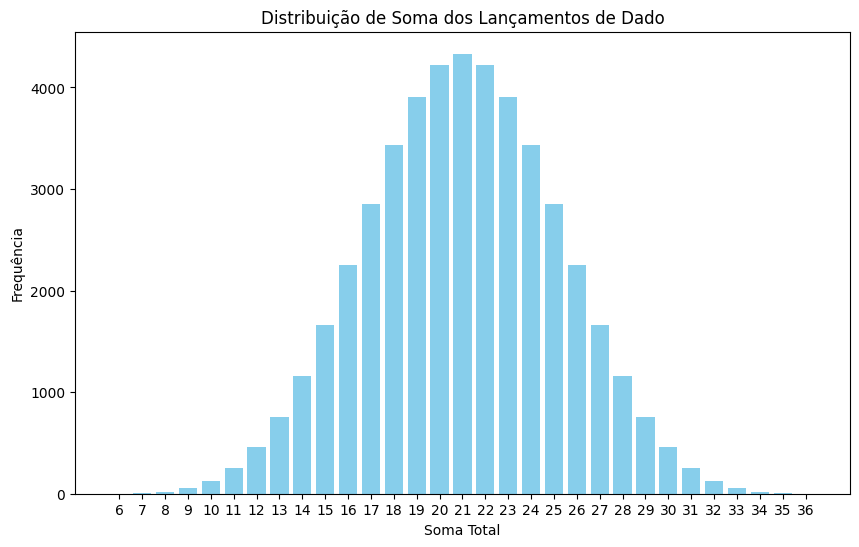

In [ ]:
import matplotlib.pyplot as plt
totais = list(espaco_amostral_ponderado.keys())
frequencias = list(espaco_amostral_ponderado.values())

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(totais, frequencias, color='skyblue')  # Cria barras com os totais e suas respectivas frequências

plt.title('Distribuição de Soma dos Lançamentos de Dado')  # Título do gráfico
plt.xlabel('Soma Total')  # Rótulo do eixo X
plt.ylabel('Frequência')  # Rótulo do eixo Y
plt.xticks(totais)  # Garante que todos os totais sejam mostrados no eixo X

plt.show()  # Exibe o gráfico


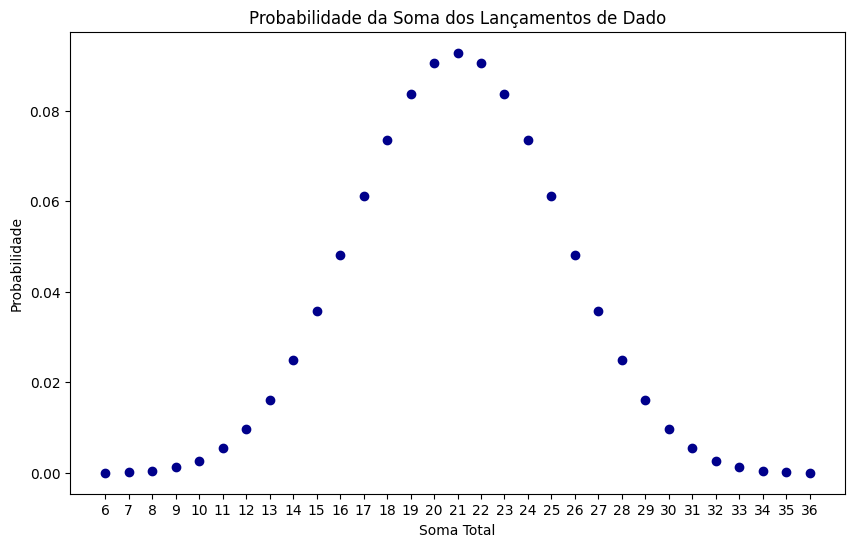

In [ ]:
import matplotlib.pyplot as plt
totais = list(espaco_amostral_ponderado.keys())
frequencias = list(espaco_amostral_ponderado.values())
proba = [x/sum(espaco_amostral_ponderado.values()) for x in frequencias]

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(totais, proba, color='darkblue')  # Cria barras com os totais e suas respectivas frequências

plt.title('Probabilidade da Soma dos Lançamentos de Dado')  # Título do gráfico
plt.xlabel('Soma Total')  # Rótulo do eixo X
plt.ylabel('Probabilidade')  # Rótulo do eixo Y
plt.xticks(totais)  # Garante que todos os totais sejam mostrados no eixo X

plt.show()  # Exibe o gráfico


In [ ]:
prob = calcula_probabilidade(lambda x : esta_em_um_intervalo(x, 10, 20), espaco_amostral_ponderado)

In [ ]:
prob

0.45177469135802467

## Lançando 10 moedas e uma introdução a distribuição binomial

Suponha o lançamento de 10 moedas justas. Qual a probabilidade de obter um número maior ou igual a 8 caras nesse experimento?


Vamos aprender nas próximas aulas, que para calcular a probabilidade de obter 8 ou mais caras ao lançar 10 moedas justas, podemos utilizar a distribuição binomial. A distribuição binomial está intimamente relacionada ao experimento de Bernoulli, ambos conceitos fundamentais em teoria da probabilidade.


Um experimento de Bernoulli é um experimento aleatório que tem apenas dois resultados possíveis, comumente chamados de "sucesso" e "fracasso". A probabilidade de sucesso é denotada por \(p\) e a probabilidade de fracasso é \(1-p\). Lançar uma moeda (considerando cara como sucesso, por exemplo) e lançar um dado (considerando obter um seis como sucesso, por exemplo) são exemplos de experimentos de Bernoulli, desde que se esteja interessado em apenas um resultado (sucesso) em detrimento do outro (fracasso).

A distribuição binomial é usada para modelar o número de sucessos em
n ensaios independentes de Bernoulli, cada um com a mesma probabilidade de sucesso p. Neste caso, um sucesso pode ser definido como obter "cara" em um lançamento de moeda, e a probabilidade de sucesso p é de 0,5, pois a moeda é justa.

A fórmula da probabilidade binomial é:

$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$

onde:
- $(P(X = k))$ é a probabilidade de obter exatamente $(k)$ sucessos em $(n)$ tentativas,
- $(\binom{n}{k})$ é o coeficiente binomial que calcula o número de maneiras de escolher $(k)$ sucessos de $(n)$ tentativas,
- $(p)$ é a probabilidade de sucesso em cada tentativa,
- $(n)$ é o número total de tentativas,
- $(k)$ é o número de sucessos desejados.

Para calcular a probabilidade de obter 8 ou mais caras em 10 lançamentos, somamos as probabilidades de obter exatamente 8 caras, exatamente 9 caras, e exatamente 10 caras:

$
P(X \geq 8) = P(X = 8) + P(X = 9) + P(X = 10)
$


A probabilidade de obter 8 ou mais caras ao lançar 10 moedas justas é de aproximadamente 0,0547, ou 5,47%.


In [ ]:
def gera_espaco_amostral_moedas(jogadas = 10):
  espaco_amostral_ponderado = defaultdict(int)
  for lancamento in product(['cara', 'coroa'], repeat=jogadas):
    qtd_caras = len([desfecho for desfecho in lancamento if desfecho == 'cara'])
    espaco_amostral_ponderado[qtd_caras] += 1
  return espaco_amostral_ponderado

In [ ]:
espaco_amostral_moedas = gera_espaco_amostral_moedas()

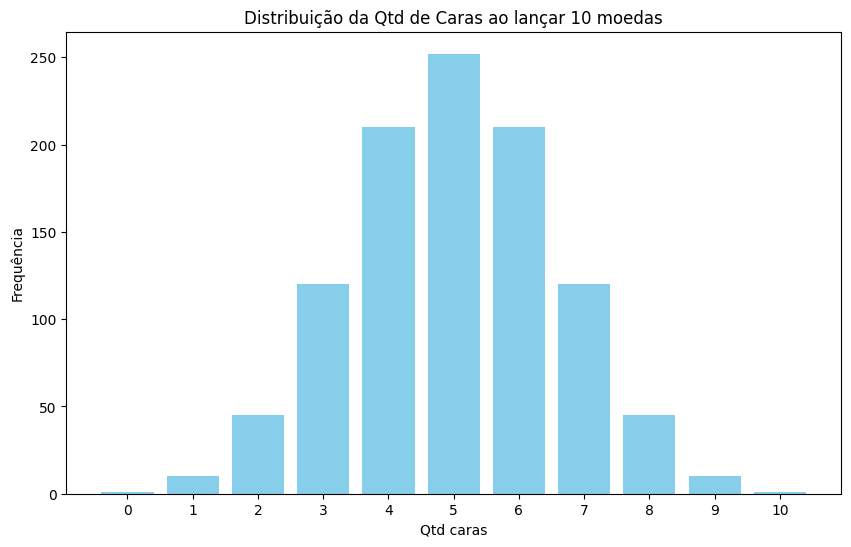

In [ ]:
import matplotlib.pyplot as plt
totais = list(espaco_amostral_moedas.keys())
frequencias = list(espaco_amostral_moedas.values())

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(totais, frequencias, color='skyblue')  # Cria barras com os totais e suas respectivas frequências

plt.title('Distribuição da Qtd de Caras ao lançar 10 moedas')  # Título do gráfico
plt.xlabel('Qtd caras')  # Rótulo do eixo X
plt.ylabel('Frequência')  # Rótulo do eixo Y
plt.xticks(totais)  # Garante que todos os totais sejam mostrados no eixo X

plt.show()  # Exibe o gráfico


In [ ]:
prob = calcula_probabilidade(lambda x : esta_em_um_intervalo(x, 8, 10), espaco_amostral_moedas)

In [ ]:
print(f'A probabilidade de obter 8 ou mais caras em um experimento de lançamento de 10 moedas é de {prob}')

A probabilidade de obter 8 ou mais caras em um experimento de lançamento de 10 moedas é de 0.0546875


In [ ]:
def oito_caras(desfecho):
  return len([face for face in desfecho if face == 'cara']) == 8

def nove_caras(desfecho):
  return len([face for face in desfecho if face == 'cara']) == 9

def dez_caras(desfecho):
  return len([face for face in desfecho if face == 'cara']) == 10

In [ ]:
espaco_moedas = set(product(['cara', 'coroa'], repeat=10))

In [ ]:
prob8 = calcula_probabilidade(oito_caras, espaco_moedas)
prob9 = calcula_probabilidade(nove_caras, espaco_moedas)
prob10 = calcula_probabilidade(dez_caras, espaco_moedas)


In [ ]:
print(f'A probabilidade de obter 8 ou mais caras é de {prob8+prob9+prob10}')

A probabilidade de obter 8 ou mais caras é de 0.0546875


## Mais um problema - Amostra com reposição

1. Uma caixa contém 10 bolas brancas, 20 bolas vermelhas e 30 bolas verdes. Se tirarmos 5 bolas da caixa com reposição (pegamos a bola, observamos de que cor ela é e colocamos de volta na caixa). Queremos saber a probabilidade de:

- Pegue 3 brancas e 2 vermelhas.
- Pegue tudo da mesma cor.

Execute o experimento 1000 vezes e calcule as probabilidades acima.

In [ ]:
caixa = {}

for i in range(60):
    if i < 10:
        caixa[i] = "Branca"
    elif (i > 9) and (i < 30):
        caixa[i] = "Vermelha"
    else:
        caixa[i] = "Verde"

In [ ]:
# faça aqui a sua solução